In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('mall_customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data=data.drop(columns=['CustomerID','Genre','Age'])

In [6]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
data=data.rename(columns={
    'Annual Income (k$)':'income',
    'Spending Score (1-100)':'score'
})

In [9]:
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
import matplotlib.pyplot as plt

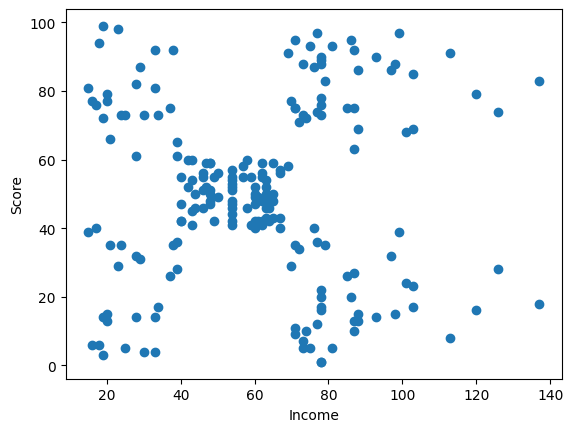

In [11]:
plt.scatter(data['income'],data['score'])
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

### Calculating K values Using El-bow Method

In [17]:
from sklearn.cluster import KMeans

In [20]:
k_list=[]
for i in range(1,10+1):
    k_list.append(i)
    
    

In [24]:
wcss_error=[]
for k in k_list:
    model=KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

C:\Users\Lasantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lasantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lasantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lasantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

In [25]:
wcss_error

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30273.394312070042,
 25022.48500453035,
 21850.165282585636,
 20067.316562465166]

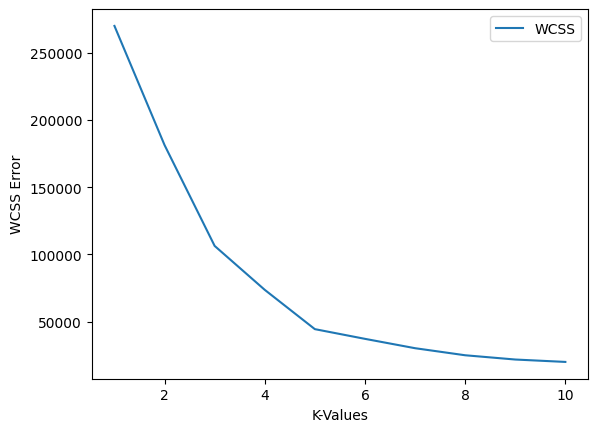

In [28]:
plt.plot(k_list,wcss_error,label='WCSS')
plt.xlabel('K-Values')
plt.ylabel('WCSS Error')
plt.legend()
plt.show()

In [31]:
final_model=KMeans(n_clusters=5)
pred=model.fit_predict(data)

C:\Users\Lasantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
pred

array([4, 8, 3, 8, 4, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 4, 8, 4, 8, 4, 8,
       3, 8, 3, 8, 4, 7, 4, 8, 3, 8, 3, 8, 3, 8, 3, 8, 4, 8, 4, 8, 4, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 9, 0, 9, 0, 2, 0, 2, 0,
       9, 0, 2, 0, 2, 0, 2, 0, 2, 0, 9, 0, 2, 0, 9, 0, 9, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 9, 0, 2, 0, 9, 0, 2, 0, 9, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 5, 9, 5, 6, 5, 9, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5])

In [33]:
data['Clusters']=pred

In [34]:
data.head()

,income,score,Clusters
0,15,39,4
1,15,81,8
2,16,6,3
3,16,77,8
4,17,40,4


In [42]:
data.head()

,income,score,Clusters,Cluster_0
0,15,39,4,False
1,15,81,8,False
2,16,6,3,False
3,16,77,8,False
4,17,40,4,False


In [40]:
data.head()

,income,score,Clusters,Cluster_0
0,15,39,4,False
1,15,81,8,False
2,16,6,3,False
3,16,77,8,False
4,17,40,4,False


In [44]:
data=data.drop(['Cluster_0'],axis=1)

In [52]:
c1=data[data['Clusters']==0]
c2=data[data['Clusters']==1]
c3=data[data['Clusters']==2]
c4=data[data['Clusters']==3]
c5=data[data['Clusters']==4]
cluster_list=[c1,c2,c3,c4,c5]

In [53]:
c2.head()

,income,score,Clusters
74,54,47,1
75,54,54,1
76,54,53,1
77,54,48,1
78,54,52,1


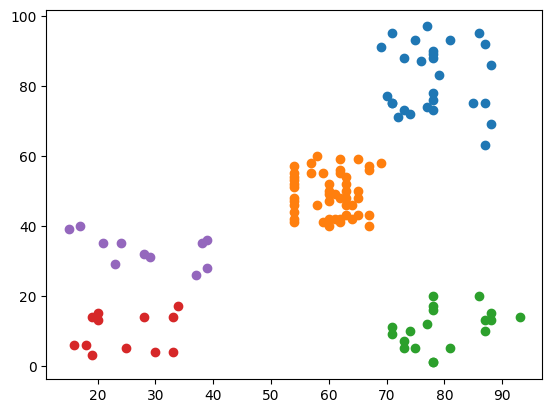

In [57]:
for i in cluster_list:
    plt.scatter(i['income'],i['score'])
